<a href="https://colab.research.google.com/github/danielamattos/Projetos---Master-Data-Decision-Science/blob/main/Atividade_Clusteriza%C3%A7%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício


Neste exercício, tentaremos identificar diferentes perfis de clientes de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket.csv`.

Esse dataset pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/sirius/customer_supermarket.xlsx')

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


### Atividade 2: Verifique se há dados ausentes. Se houver, faça o tratamento.

In [ ]:
df.info()

df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   float64       
 1   Year_Birth           2216 non-null   float64       
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   float64       
 6   Teenhome             2216 non-null   float64       
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   float64       
 9   MntWines             2216 non-null   float64       
 10  MntFruits            2216 non-null   float64       
 11  MntMeatProducts      2216 non-null   float64       
 12  MntFishProducts      2216 non-null   float64       
 13  MntSweetProducts     2216 non-nul

In [ ]:
#Analisando a base de dados, tem um outlier com valor de Income=666666, vamos retirar essa linha para não influenciar no agrupamento

df=df[df['Income'] != 666666]

df.shape

(2215, 29)

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
df['MntTotal'] = df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']+df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,1445.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,25.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,665.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,376.0


### Atividade 4: Crie uma coluna chamada "Days_Registered" que é a quantidade de dias desde que o cliente se registrou. Considere que a data de início é de 01/01/2015.

In [ ]:
import datetime as dt

df['start_Date'] = dt.datetime(2015,1,1)

df['Days_Registered'] = (df['start_Date'] - df['Dt_Customer']).dt.days


df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,start_Date,Days_Registered
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,0.0,0.0,0.0,0.0,3.0,11.0,1.0,1445.0,2015-01-01,849
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,25.0,2015-01-01,299
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,665.0,2015-01-01,498
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2015-01-01,325
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,376.0,2015-01-01,347


### Atividade 5: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
df2 = df[['Recency', 'Days_Registered', 'MntTotal', 'Income']]

df2.head()

,Recency,Days_Registered,MntTotal,Income
0,58.0,849,1445.0,58138.0
1,38.0,299,25.0,46344.0
2,26.0,498,665.0,71613.0
3,26.0,325,43.0,26646.0
4,94.0,347,376.0,58293.0


### Atividade 6: Padronize os dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df2.copy()

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled


,Recency,Days_Registered,MntTotal,Income
0,0.310113,1.528882,1.537898,0.286604
1,-0.380899,-1.188066,-0.956951,-0.261407
2,-0.795506,-0.205025,0.167488,0.912723
3,-0.795506,-1.059629,-0.925326,-1.176680
4,1.553934,-0.950951,-0.340267,0.293806
...,...,...,...,...
2235,-0.104494,0.135828,1.281386,0.429949
2236,0.241012,-1.652417,-0.220795,0.559634
2237,1.450282,-0.980590,1.123261,0.232844
2238,-1.417416,-0.975650,0.339668,0.802694


### Atividade 7: Faça um agrupamento hierárquico e plote o dendograma.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
distancias = linkage(df_scaled[['Recency','Days_Registered','MntTotal','Income']], method='ward', metric='euclidean')

In [ ]:
import seaborn as sns



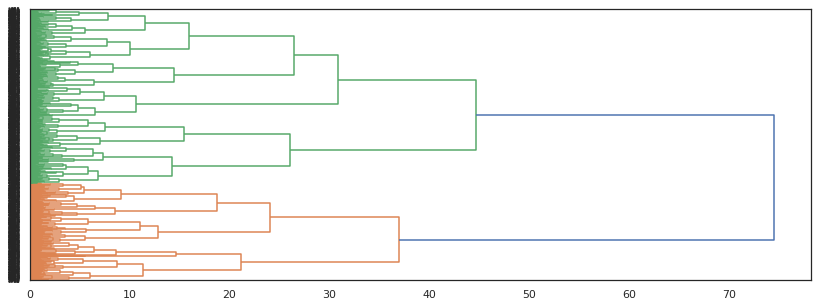

In [ ]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias, orientation='right')

### Atividade 8: Qual quantidade parece adequada para o número de grupos?

Analisando o dendograma, pelo tamanho das linhas que separam o grupo, é possível notar que até 4 grupos temos uma distância considerável, porém a partir de 5 grupos, a semelhança entre eles já parece maior. Vamos confirmar a informação com a função fcluster.




In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 35

grupos = fcluster(distancias, t=max_d, criterion='distance')
grupos.max()

4

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Dica: use gráficos para ter um bom entendimento de como os grupos se comparam.

<ipython-input-17-750546cb361b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grupos']=grupos


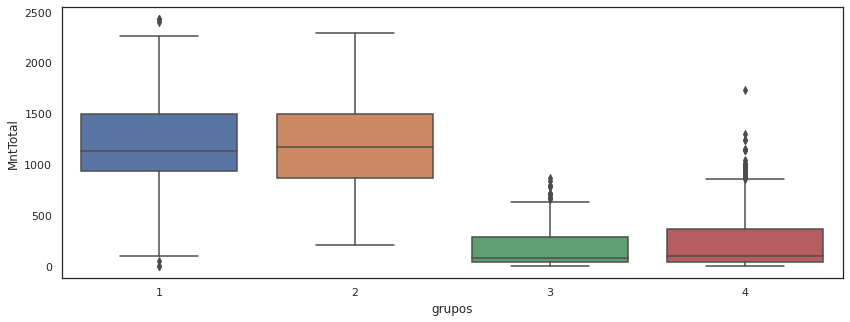

In [ ]:
import seaborn as sns

df2['grupos']=grupos

sns.boxplot(data=df2, x='grupos', y='MntTotal');

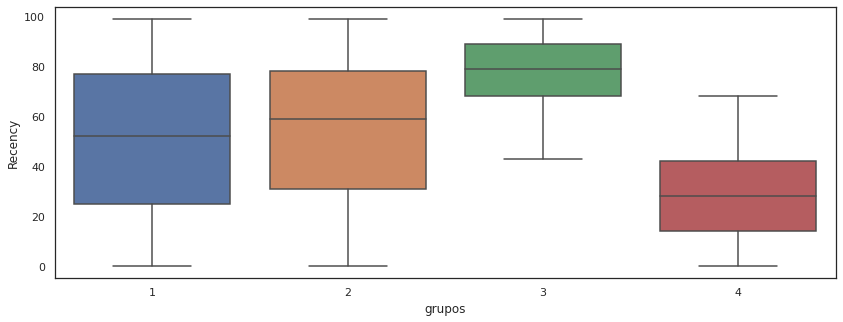

In [ ]:
sns.boxplot(data=df2, x='grupos', y='Recency');

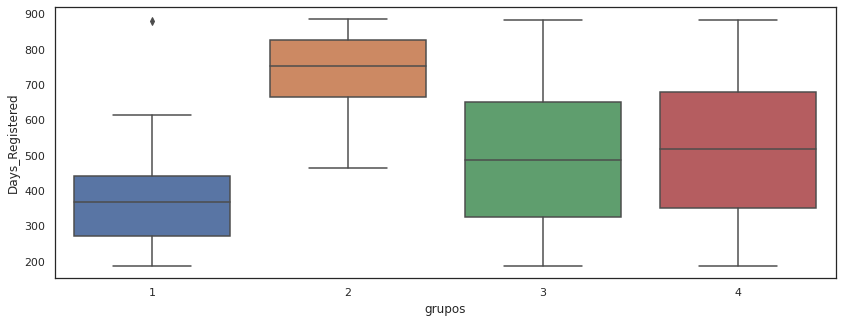

In [ ]:
sns.boxplot(data=df2, x='grupos', y='Days_Registered');

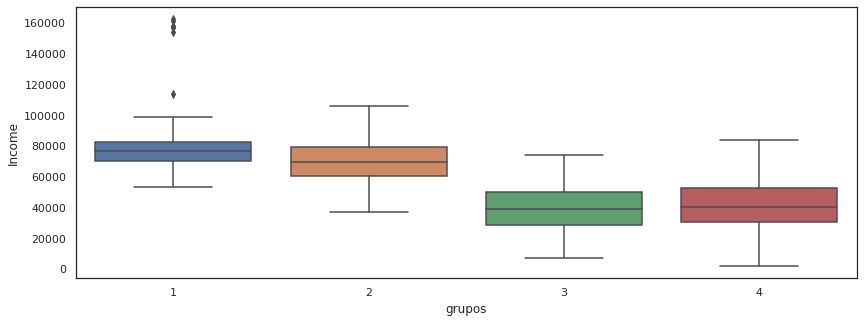

In [ ]:
sns.boxplot(data=df2, x='grupos', y='Income');

In [ ]:
df['grupos']=df2['grupos']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,start_Date,Days_Registered,grupos
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,0.0,0.0,0.0,3.0,11.0,1.0,1445.0,2015-01-01,849,2
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0.0,0.0,0.0,3.0,11.0,0.0,25.0,2015-01-01,299,4
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0.0,0.0,0.0,3.0,11.0,0.0,665.0,2015-01-01,498,4
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2015-01-01,325,4
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,0.0,0.0,0.0,3.0,11.0,0.0,376.0,2015-01-01,347,3


In [ ]:
df4=df[['grupos','Recency','Days_Registered','MntTotal','Income','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

df4=df4.groupby(by='grupos').mean()

df4

,Recency,Days_Registered,MntTotal,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
grupos,,,,,,,,
1,50.206452,362.551613,1214.122581,77986.929032,5.203226,5.864516,8.125806,2.625806
2,53.938017,738.119835,1187.880165,69535.382231,6.140496,5.020661,8.504132,4.714876
3,77.966605,498.853432,182.500928,39420.586271,2.996289,1.018553,4.163265,6.105751
4,28.225624,517.548753,240.521542,40855.412698,3.231293,1.270975,4.504535,6.115646


Analisando os boxplots e as médias, podemos então considerar que:

* O grupo 1 é composto por pessoas que têm altos salários, um valor de compra alto, fazem bastante compras na loja e estão registrados há menos tempo.  Isto pode sugerir consumidores que não são afetados por promoções e frequentemente compram produtos de alto valor.

* O grupo 2 é semelhante ao grupo 1 em relação aos altos salários e ao alto valor de compra, porém estão registrados há mais tempo na empresa, indicando que são clientes fieis e que podem não ser afetados pelas promoções, pois compram produtos de alto valor. Compram em maior quantidade no site e diretamente nas lojas, porém estão sem comprar há um tempo considerável, podendo indicar que os clientes perderam o interesse na empresa.

* O grupo 3 é composto por pessoas que têm baixos salários e possuem um valor das compras baixo. Os consumidores visitam bastante o site e isso pode ser um indicativo de que buscam promoções para adquirir produtos de baixo valor.

* O grupo 4 é semelhante ao grupo 3, porém é composto por pessoas que compram com maior frequência, visitam bastante o site, o que pode ser um indicativo de que buscam promoções para adquirir produtos de baixo valor.


### Para refletir: Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding

Podemos usar o One Hot Encoding para transformar variáveis categóricas em números, por exemplo, considerando diferentes níveis de educação, "Ensino Básico", "Ensino Médio" e "Ensino Superior", podemos transformá-los através dessa técnica nos números 1, 2 e 3. Assim conseguimos trabalhar com agrupamentos.